# Practical 5A: Illustration example

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os

In [3]:
# os.chdir('D:/MS0240')

In [4]:
data = pd.read_csv("illustrateEg.csv")
data.head()

,X1,X2
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0


In [5]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(data)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data)

In [6]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the PCs, eigenvalues and percentage variance explained.
# The eigenvalues obtained may sometimes be slightly different due to difference in method.

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [7]:
pca_results

,Eigenvalue,Explained Variance,X1,X2
PC 1,1.2840,0.9632,-0.6779,-0.7352
PC 2,0.0491,0.0368,-0.7352,0.6779


In [8]:
#Obtain scores from original data that are not centred

scores_notcentred = np.dot(data, pca.components_.T)
scores_notcentred = pd.DataFrame(scores_notcentred, columns = ['PC1', 'PC2'])
scores_notcentred.head()

,PC1,PC2
0,-3.459112,-0.211050
1,-0.853562,0.106922
2,-3.623340,0.348440
3,-2.905352,0.094482
4,-4.306944,-0.245434


In [9]:
# Plots score plot.
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the score plot

def scoreplot(data, scores, pca, width=5, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores)

    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

<Figure size 432x288 with 0 Axes>

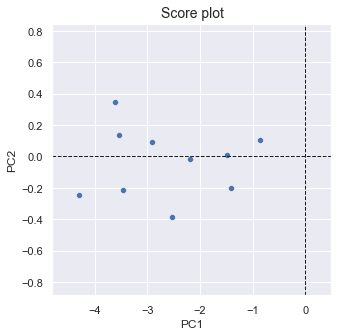

In [10]:
plt.clf()
ax4 = scoreplot(data, scores_notcentred, pca)
plt.show()

In [11]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(-1, 1)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

<Figure size 432x288 with 0 Axes>

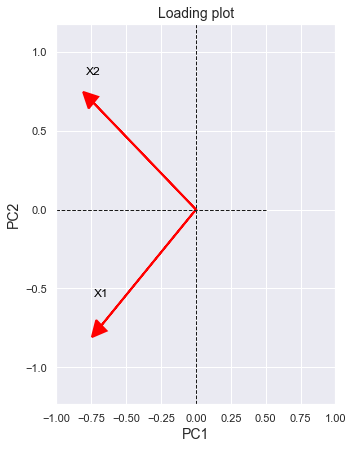

In [12]:
plt.clf()
ax5 = loadingplot(data, pca, width=5, height=7)
plt.show()

In [13]:
# Create dataframe for centred scores
  = pd.DataFrame(pca_samples, columns = ['PC1', 'PC2'])

IndentationError: unexpected indent (Temp/ipykernel_964/111804180.py, line 2)

In [ ]:
# This function plots the biplot.
# Pass centred scores dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def biplot(scores, pca, width=5, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x='PC1', y='PC2', data = scores)

    #Set margins and limits for figure
    x_min = min(scores['PC1'].min(), pca.components_[0,:].min(), 0) - margin
    x_max = max(scores['PC1'].max(), pca.components_[0,:].max(), 0) + margin
    y_min = min(scores['PC2'].min(), pca.components_[1,:].min(), 0) - margin
    y_max = max(scores['PC2'].max(), pca.components_[1,:].max(), 0) + margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Biplot", fontsize=14)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

In [ ]:
plt.clf()
ax6 = biplot(scores_centred, pca, width=10, height=5, margin=0.3)
plt.show()